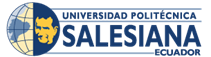

<font size="4"><strong>ESTUDIANTE:</strong> Martin Bojorque, Ivan Ulloa<br><strong>ASIGNATURA:</strong> Aprendizaje de Máquina</font>

# Actividad Algoritmos Computacion Evolutiva

In [ ]:
import requests, zipfile, io
#engine='python3'

#r = requests.get("http://files.grouplens.org/datasets/movielens/ml-1m.zip")
r = requests.get("http://files.grouplens.org/datasets/movielens/ml-100k.zip")
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [ ]:
from numpy.random import seed
seed(1)

from tensorflow.keras.datasets import mnist
import math, time 
import matplotlib.pyplot as plt
import numpy as np 
#!pip install seaborn
import seaborn as sns
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

names = ['userId', 'movieId', 'rating', 'timestamp']
df = pd.read_csv('ml-100k/u.data', delimiter='\t', names = names)
#df.fillna(0, inplace=True)
df.head() 

,userId,movieId,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [ ]:
names = ['movieId', 'title', 'genres']
dfMovies = pd.read_csv('ml-1m/movies.dat', delimiter='::', names = names)
dfMovies.head() 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


,movieId,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler,OrdinalEncoder
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline

lis_dat = df.columns

preprocesador1 = make_column_transformer(
    (StandardScaler(),lis_dat))

X = preprocesador1.fit_transform(df)

cnamesDataset1 = lis_dat
#print(cnamesDataset2)

DatasetPreprocesado = pd.DataFrame(data=X,columns=cnamesDataset1)
DatasetPreprocesado.head()

,userId,movieId,rating,timestamp
0,-0.999519,-0.554812,-0.470707,-0.426268
1,-1.037026,-0.373432,-0.470707,1.532401
2,-1.652150,-0.146707,-2.247430,-0.868616
3,-0.819482,-1.132206,-1.359069,-0.546786
4,-1.112041,-0.240420,-2.247430,0.536833


In [ ]:
df.describe()

,userId,movieId,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [ ]:
df.mode()

,userId,movieId,rating,timestamp
0,405,50,4,891033606


In [ ]:
df.var()

userId       7.108325e+04
movieId      1.094276e+05
rating       1.267141e+00
timestamp    2.855680e+13
dtype: float64

In [ ]:
df.cov()

,userId,movieId,rating,timestamp
userId,7.108325e+04,9.152046e+02,-2.812498,2.718650e+07
movieId,9.152046e+02,1.094276e+05,-70.424359,7.400918e+07
rating,-2.812498e+00,-7.042436e+01,1.267141,-7.220117e+04
timestamp,2.718650e+07,7.400918e+07,-72201.172602,2.855680e+13


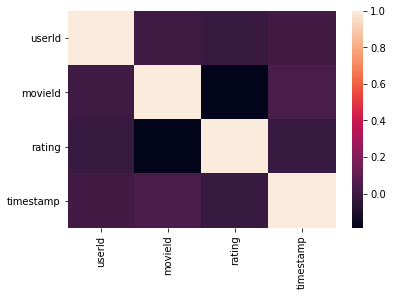

In [ ]:
cr=DatasetPreprocesado.corr()

#MAPA DE CALOR DE LAS CORRELACIONES
import numpy as np 
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

# plot heatmap
ax = sns.heatmap(cr.T)

# turn the axis label
for item in ax.get_yticklabels():
    item.set_rotation(0)

for item in ax.get_xticklabels():
    item.set_rotation(90)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


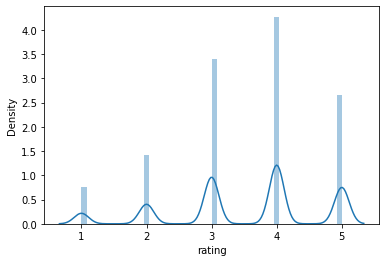

In [ ]:
import seaborn as sns
sns.distplot(df["rating"]);

<font size="4"><br><strong>Observaciones </strong><br><br> Podemos notar que los ratings promedio de las películas en la base de datos es 3.5, donde al parecer no muchos usuarios dan ratings muy bajos a las películas que han visto, sin importar que no la disfrutaron. En términos de los usuarios, podemos ver que los usuarios que tienen un ID que se encuentra en el centro son más activos dando ratings.<br><br>En términos de datos correlacionados, tenemos pocas columnas que facilitan la visualización de ciertas particularidades. Tenemos que ninguno de los atributos están correlacionados, a excepción de timestamp y movieid. Esto puede estar relacionado a que los usuarios, por lo general, van a dar una calificación a la película después de verla en el cine alrededor de la fecha de lanzamiento.</font>

## Creación de la Matriz de Raitings

In [ ]:
#sampled_x = df[0:200000]
sampled_x = df
X_train, X_test = train_test_split(sampled_x, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(80000, 4)
(20000, 4)


In [ ]:
df_train = pd.pivot_table(X_train,index="userId",values="rating",columns="movieId")
df_train = df_train.fillna(0)
print(df_train.shape)
df_train.head()

(943, 1653)


movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,1631,1633,1634,1635,1636,1638,1639,1642,1643,1644,1645,1646,1647,1650,1651,1652,1653,1654,1656,1657,1658,1659,1660,1661,1662,1663,1664,1665,1666,1667,1668,1670,1671,1672,1673,1676,1678,1679,1680,1681
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,3.0,4.0,0.0,3.0,0.0,4.0,0.0,5.0,3.0,2.0,5.0,5.0,5.0,5.0,5.0,3.0,4.0,5.0,0.0,0.0,4.0,4.0,3.0,4.0,0.0,2.0,4.0,1.0,3.0,0.0,0.0,4.0,2.0,1.0,2.0,2.0,0.0,4.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
describir=df_train.describe().T
describir.sort_values("mean")

,count,mean,std,min,25%,50%,75%,max
movieId,,,,,,,,
1562,943.0,0.001060,0.032564,0.0,0.0,0.0,0.0,1.0
907,943.0,0.001060,0.032564,0.0,0.0,0.0,0.0,1.0
1569,943.0,0.001060,0.032564,0.0,0.0,0.0,0.0,1.0
1570,943.0,0.001060,0.032564,0.0,0.0,0.0,0.0,1.0
1571,943.0,0.001060,0.032564,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
127,943.0,1.525981,2.125848,0.0,0.0,0.0,4.0,5.0
258,943.0,1.594910,1.983278,0.0,0.0,0.0,4.0,5.0
181,943.0,1.724284,2.074083,0.0,0.0,0.0,4.0,5.0


In [ ]:
describir.sort_values("std")

,count,mean,std,min,25%,50%,75%,max
movieId,,,,,,,,
599,943.0,0.001060,0.032564,0.0,0.0,0.0,0.0,1.0
830,943.0,0.001060,0.032564,0.0,0.0,0.0,0.0,1.0
852,943.0,0.001060,0.032564,0.0,0.0,0.0,0.0,1.0
907,943.0,0.001060,0.032564,0.0,0.0,0.0,0.0,1.0
1290,943.0,0.001060,0.032564,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
174,943.0,1.435843,2.077549,0.0,0.0,0.0,4.0,5.0
98,943.0,1.465536,2.091493,0.0,0.0,0.0,4.0,5.0
127,943.0,1.525981,2.125848,0.0,0.0,0.0,4.0,5.0


In [ ]:
describir.sort_values("max")

,count,mean,std,min,25%,50%,75%,max
movieId,,,,,,,,
1329,943.0,0.001060,0.032564,0.0,0.0,0.0,0.0,1.0
1581,943.0,0.001060,0.032564,0.0,0.0,0.0,0.0,1.0
1582,943.0,0.001060,0.032564,0.0,0.0,0.0,0.0,1.0
1583,943.0,0.001060,0.032564,0.0,0.0,0.0,0.0,1.0
1584,943.0,0.001060,0.032564,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
546,943.0,0.669141,1.349991,0.0,0.0,0.0,0.0,5.0
544,943.0,0.187699,0.792599,0.0,0.0,0.0,0.0,5.0
543,943.0,0.056204,0.467660,0.0,0.0,0.0,0.0,5.0


In [ ]:
df_test = pd.pivot_table(X_test,index="userId",values="rating",columns="movieId")
df_test = df_test.fillna(0)
print(df_test.shape)
df_test.head()

(940, 1411)


movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,38,39,40,41,...,1546,1550,1551,1565,1578,1590,1591,1596,1597,1598,1599,1600,1601,1603,1607,1609,1611,1612,1615,1620,1622,1623,1629,1631,1632,1637,1640,1641,1642,1643,1648,1649,1655,1656,1658,1669,1674,1675,1677,1682
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,5.0,0.0,0.0,3.0,0.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,5.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
describir=df_test.describe().T
describir.sort_values("mean")

,count,mean,std,min,25%,50%,75%,max
movieId,,,,,,,,
1364,940.0,0.001064,0.032616,0.0,0.0,0.0,0.0,1.0
1246,940.0,0.001064,0.032616,0.0,0.0,0.0,0.0,1.0
1590,940.0,0.001064,0.032616,0.0,0.0,0.0,0.0,1.0
1565,940.0,0.001064,0.032616,0.0,0.0,0.0,0.0,1.0
1349,940.0,0.001064,0.032616,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
181,940.0,0.431915,1.282570,0.0,0.0,0.0,0.0,5.0
100,940.0,0.445745,1.327289,0.0,0.0,0.0,0.0,5.0
258,940.0,0.459574,1.290361,0.0,0.0,0.0,0.0,5.0


In [ ]:
describir.sort_values("std")

,count,mean,std,min,25%,50%,75%,max
movieId,,,,,,,,
1259,940.0,0.001064,0.032616,0.0,0.0,0.0,0.0,1.0
799,940.0,0.001064,0.032616,0.0,0.0,0.0,0.0,1.0
1609,940.0,0.001064,0.032616,0.0,0.0,0.0,0.0,1.0
1304,940.0,0.001064,0.032616,0.0,0.0,0.0,0.0,1.0
788,940.0,0.001064,0.032616,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
181,940.0,0.431915,1.282570,0.0,0.0,0.0,0.0,5.0
258,940.0,0.459574,1.290361,0.0,0.0,0.0,0.0,5.0
100,940.0,0.445745,1.327289,0.0,0.0,0.0,0.0,5.0


In [ ]:
describir.sort_values("max")

,count,mean,std,min,25%,50%,75%,max
movieId,,,,,,,,
1546,940.0,0.001064,0.032616,0.0,0.0,0.0,0.0,1.0
913,940.0,0.001064,0.032616,0.0,0.0,0.0,0.0,1.0
36,940.0,0.002128,0.046102,0.0,0.0,0.0,0.0,1.0
1308,940.0,0.001064,0.032616,0.0,0.0,0.0,0.0,1.0
1272,940.0,0.001064,0.032616,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
423,940.0,0.241489,0.970371,0.0,0.0,0.0,0.0,5.0
886,940.0,0.030851,0.332969,0.0,0.0,0.0,0.0,5.0
887,940.0,0.054255,0.459468,0.0,0.0,0.0,0.0,5.0


## Desarrollo del Algoritmo Genético

In [ ]:
import random
import operator

largo = df_train.shape[1]
num = df_train.shape[0]
mutation_chance = 0.2
pressure = 200

In [ ]:
def individual(min, max):
    """
        Crea un individual
    """
    return[random.randint(min, max) for i in range(largo)]

def crearPoblacionRatings(users=10):
    """
        Crea una poblacion nueva de individuos
    """
    return np.asmatrix(df_train.loc[0:users].values)

def crearPoblacion():
    """
        Crea una poblacion nueva de individuos
    """
    return [individual(0,5) for i in range(num)]

In [ ]:
import math

def average(x):
    assert len(x) > 0
    return float(sum(x)) / len(x)
def pearson_def(x, y):
    assert len(x) == len(y)
    n = len(x)
    assert n > 0
    avg_x = average(x)
    avg_y = average(y)
    diffprod = 0
    xdiff2 = 0
    ydiff2 = 0
    for idx in range(n):
        xdiff = x[idx] - avg_x
        ydiff = y[idx] - avg_y
        diffprod += xdiff * ydiff
        xdiff2 += xdiff * xdiff
        ydiff2 += ydiff * ydiff

    return diffprod / math.sqrt(xdiff2 * ydiff2)

def calcularFitness3(individual):
    """
        Calcula el fitness de un individuo concreto.
    """
    fitness = 0
    euclidea = 0
    individual = np.array(individual)
    individual = individual.flatten()
    
    
    for i in range(len(individual)):    
        euclidea = euclidea + (model[i]-individual[i])**2
     
    fitness =  math.sqrt(euclidea)
    return fitness

def calcularFitness2(individual):
    fitness = 0
    individual = np.array(individual)
    individual = individual.flatten()
    fitness = pearson_def(model, individual)
    return fitness
    

def calcularFitness(individual):
    """
        Calcula el fitness de un individuo concreto.
    """
    fitness = 0
    individual = np.array(individual)
    individual = individual.flatten()
    
    for i in range(len(individual)):
       
        if (individual[i]==model[i]):
            fitness += 1
            
    return fitness

In [ ]:
def selection_and_reproduction(population):
    
    puntuados = [ (calcularFitness3(i), i) for i in population] 
    
    puntuados = [np.array(i[1]).flatten() for i in sorted(puntuados, key=operator.itemgetter(0))]
    #print("\nPrueba:\n%s"%(puntuados))
    population = puntuados
    
  
    selected =  puntuados[(len(puntuados)-pressure):] 
    
    for i in range(len(population)-pressure):
        punto = random.randint(1,largo-1)
        padre = random.sample(selected, 2)
          
        population[i][:punto] = padre[0][:punto]
        population[i][punto:] = padre[1][punto:]
  
    return population

In [ ]:
def mutation(population):
    """
        Se mutan los individuos al azar. Sin la mutacion de nuevos genes nunca podria
        alcanzarse la solución.
    """
    for i in range(len(population)-pressure):
        if random.random() <= mutation_chance: 
            punto = random.randint(0,largo-1) 
            nuevo_valor = random.randint(0,5) 
  
            while nuevo_valor == population[i][punto]:
                nuevo_valor = random.randint(0,5)

            population[i][punto] = nuevo_valor
  
    return population

In [ ]:
#PREDICCIONES Y RECOMENDACIONES USUADIO 1

population = crearPoblacion()
#population = df_train.iloc[0:, :].values
print("\nPoblacion Inicial:\n\n%s"%(np.array(population)))
print("Tamaño: ", len(population))

model = df_train.iloc[0].values

for i in range(1):
    population = selection_and_reproduction(population)
    population = mutation(population)
 
print("\nPoblacion Final:\n%s"%(np.array(population)))
print("\n\n")


Poblacion Inicial:

[[3 4 0 ... 1 1 3]
 [1 4 4 ... 1 0 3]
 [5 0 2 ... 1 3 2]
 ...
 [2 2 2 ... 4 3 2]
 [0 2 4 ... 2 3 0]
 [1 0 0 ... 3 2 0]]
Tamaño:  943

Poblacion Final:
[[4 1 4 ... 0 1 3]
 [5 5 5 ... 2 4 2]
 [1 0 5 ... 2 5 1]
 ...
 [4 1 1 ... 2 4 0]
 [4 4 4 ... 3 1 1]
 [4 0 4 ... 2 0 5]]





In [ ]:
#Cargar modelo guardado
import csv
from google.colab import drive
#drive.mount('/content/drive')

aux = pd.DataFrame(data=population,  columns=np.array(df_train.columns))
aux.to_csv("/content/drive/MyDrive/Machine_Learning/modelo_terminado.csv")   
#!ls /content/drive/MyDrive/Machine_Learning
#np.savetxt("/content/drive/MyDrive/Machine_Learning/modelo_terminado.csv", population, delimiter=",")
#reader = csv.reader(open("/content/drive/MyDrive/Machine_Learning/modelo_terminado.csv", "rb"), delimiter=",")
#popolation_saved = result = np.array(list(reader)).    

In [ ]:
from sklearn.metrics import mean_absolute_error

df_population = pd.DataFrame(data=population, columns=np.array(df_train.columns))
real_data = X_test.loc[X_test['userId'] == 1].reset_index()
aux_pred = df_population.tail(200).mean().to_frame().T
df_predic = pd.DataFrame(columns=['userId','movieId', 'real', 'predic'])

for k in aux_pred.columns.values:
  try:
    np.where(real_data.iloc[:, 2].values == k)[0][0]
    a = np.array(real_data.loc[ real_data [ 'movieId' ] == k].iloc[:,2])[0]
    b = np.array(real_data.loc[ real_data [ 'movieId' ] == k].iloc[:,3])[0]
    c = aux_pred.loc[:, k][0]

    df_predic.loc[len(df_predic)] = [1, k,b,c]

  except:
    a = 0

print("MAE: ",mean_absolute_error(df_predic.iloc[:,2].values, df_predic.iloc[:,3].values), "\n")
df_predic

MAE:  1.3186718750000002 



,userId,movieId,real,predic
0,1.0,1.0,5.0,2.645
1,1.0,4.0,3.0,2.735
2,1.0,6.0,5.0,2.620
3,1.0,8.0,1.0,2.545
4,1.0,20.0,4.0,2.770
...,...,...,...,...
59,1.0,259.0,1.0,2.550
60,1.0,262.0,3.0,2.585
61,1.0,263.0,1.0,2.485
62,1.0,265.0,4.0,2.220


In [ ]:
aux_recomen = []
df_recomen = pd.DataFrame(columns=[aux_pred.columns])

for k in aux_pred.values[0]:
  if (k>3):   
    aux_recomen.append(1)
  else:
    aux_recomen.append(0)

df_recomen.loc[len(df_recomen)] = aux_recomen
df_recomen

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,1631,1633,1634,1635,1636,1638,1639,1642,1643,1644,1645,1646,1647,1650,1651,1652,1653,1654,1656,1657,1658,1659,1660,1661,1662,1663,1664,1665,1666,1667,1668,1670,1671,1672,1673,1676,1678,1679,1680,1681
0,0,1,1,0,1,0,1,0,0,0,0,1,0,1,1,0,1,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [ ]:
import random

col = 0
movies_recomen = []

for k in df_recomen.values[0]:
  if (k==1):
    try:
      movies_recomen.append(dfMovies.loc[dfMovies['movieId'] == df_recomen.columns[col][0]].iloc[0,1])
    except:
      d=0
  col=col+1

movies_recomen
random.sample(movies_recomen, 3)

['Victor/Victoria (1982)', "McHale's Navy (1997)", 'Jack (1996)']

In [ ]:
#PREDICCIONES Y RECOMENDACIONES TODOS
import time
from sklearn.metrics import mean_absolute_error

df_predic = pd.DataFrame(columns=['userId','movieId', 'real', 'predic'])
df_recomen = pd.DataFrame(columns=[df_train.columns])
MAE = []
time_excec = []

#population = df_train.iloc[0:, :].values

for i in range(num):
  population = crearPoblacion()
  start_time = time.time()

  model = df_train.iloc[i].values
  #print(i)
    
  for j in range(5):
      population = selection_and_reproduction(population)
      population = mutation(population)
  
  #-----------------Predicciones---------------------
  df_population = pd.DataFrame(data=population, columns=np.array(df_train.columns))
  real_data = X_test.loc[X_test['userId'] == i+1].reset_index()
  aux_pred = df_population.tail(200).mean().to_frame().T

  for k in aux_pred.columns.values:
    try:
      np.where(real_data.iloc[:, 2].values == k)[0][0]
      b = np.array(real_data.loc[ real_data [ 'movieId' ] == k].iloc[:,3])[0]
      c = aux_pred.loc[:, k][0]

      df_predic.loc[len(df_predic)] = [i+1, k,b,c]

    except:
      a = 0

  MAE.append(mean_absolute_error(df_predic.iloc[:,2].values, df_predic.iloc[:,3].values))
  
  #-----------------Recomendaciones-------------------
  aux_recomen = []

  for l in aux_pred.values[0]:
    if (l>3):   
      aux_recomen.append(1)
    else:
      aux_recomen.append(0)

  end_time = time.time()
  time_excec.append(end_time - start_time)
  df_recomen.loc[len(df_recomen)] = aux_recomen
 
print("PREDICCIONES Y RECOMENDACIONES HACHAS")

PREDICCIONES Y RECOMENDACIONES HACHAS


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_recomen.to_csv('/content/drive/MyDrive/Machine_Learning/df_recomen.csv')
df_predic.to_csv('/content/drive/MyDrive/Machine_Learning/df_predic.csv')

In [ ]:
from numpy import genfromtxt
df_predic = pd.read_csv('/content/drive/MyDrive/Machine_Learning/df_predic.csv', delimiter=',')
df_recomen = pd.read_csv('/content/drive/MyDrive/Machine_Learning/df_recomen.csv', delimiter=',')

In [ ]:
import random

col = 0
aux_movies = []
movies_recomen = pd.DataFrame(columns=['userId','movie1', 'movie2', 'movie3'])

for i in range(len(df_recomen)):
  for k in df_recomen.values[i]:
    if (k==1):
      try:        
        aux_movies.append(dfMovies.loc[dfMovies['movieId'] == df_recomen.columns[col][0]].iloc[0,1])
      except:
        d=0
    col=col+1
  
  aux_movies = random.sample(aux_movies, 3)
  movies_recomen.loc[len(movies_recomen)] = [i+1, aux_movies[0], aux_movies[1], aux_movies[2]]

In [ ]:
movies_recomen.head()

,userId,movie1,movie2,movie3
0,1,Free Willy 2: The Adventure Home (1995),"Nightmare on Elm Street, A (1984)",Screamers (1995)
1,2,Free Willy 2: The Adventure Home (1995),"Nightmare on Elm Street, A (1984)",Screamers (1995)
2,3,Screamers (1995),"Nightmare on Elm Street, A (1984)",Free Willy 2: The Adventure Home (1995)
3,4,Screamers (1995),"Nightmare on Elm Street, A (1984)",Free Willy 2: The Adventure Home (1995)
4,5,Screamers (1995),"Nightmare on Elm Street, A (1984)",Free Willy 2: The Adventure Home (1995)


TIEMPO PROMEDIO POR ITERACION (s):  17.85219796009812
TIEMPO TOTAL DE EJECUCION (h):  4.676284076770147
MAE TOTAL (h):  1.453203715759427 




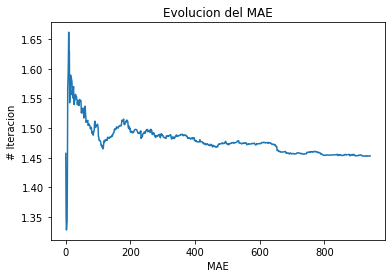

In [ ]:
import matplotlib.pyplot as plt

print("TIEMPO PROMEDIO POR ITERACION (s): ", np.array(time_excec).mean())
print("TIEMPO TOTAL DE EJECUCION (h): ", sum(time_excec)/60/60)
print("MAE TOTAL (h): ", MAE[942], "\n\n")

plt.plot(range(num), MAE)
plt.title('Evolucion del MAE')
plt.ylabel('# Iteracion')
plt.xlabel('MAE')
plt.show()

**CONCLUSIONES**
<br><br>
Al momento de realizar esta práctica encontramos un sinumero de problemas, principalmente generados por nuestra inexperiencia con el tema. La creación del algoritmo genético es más complicada de lo que pensamos al principio, es necesario tener conocimiento de los conceptos de reproducción y mutación, pero sobre todo el fitness. El fitness determinará como los distintos usuarios (en este caso) encuentran sus vecinos, es decir los que más se asemejan al modelo. <br><br>
A partir de estos vecinos se sacaron las recomendaciones y las predicciones, no tuvimos un MAE particularmente bueno, el algoritmo tardaba considerablemente en ejecutarse y nos quitaba mucho tiempo el sacar los datos para todos los usuarios. Lo que notamos es que usar el algoritmo genético puede resultar en dos situaciones no deseadas. La primera es que los vecinos se parezcan demasiado al modelo, esto impidiéndonos realizar predicciones y recomendaciones. La segunda fue, que los datos no representen información valiosa al ser muy diferentes entre sí.